In [134]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import statistics
import seaborn as sb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# I - Affichage et étude des données :

## 1- Affichage

In [135]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv", na_values = missing_value_formats)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


##  2- Générer des statistiques descriptives : 

---
    
    
  Les statistiques descriptives comprennent celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de   données, à l'exclusion des NaNvaleurs.

---

In [138]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  3- La visualisation des données :  : 

---
    
    après avoir effectué l 'étude descriptive il sera préférable d'illustrer la distribution des variables , et comprendre leur distribution selon la variable cible :Biopsy
---

#### visualisation de la variable 'Age'

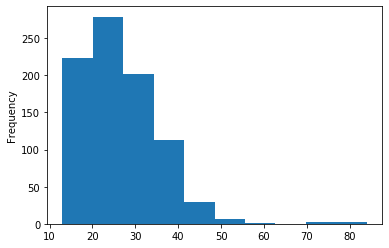

In [205]:
df['Age'].plot.hist()


#### on remarque que la variable ne suit pas une distribution symétrique 

#### visualisation de la variable 'Hormonal Contraceptives (years)'

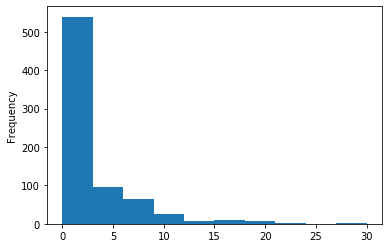

In [206]:
df['Hormonal Contraceptives (years)'].plot.hist()


#### la meme chose que la variable précédente , ne suit pas une distribution symétrique 

#### visualisation de la variable 'STDs: Number of diagnosis'

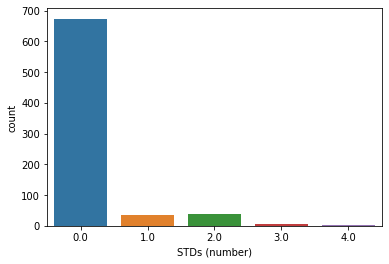

In [207]:
sb.countplot(df['STDs (number)'])

#### visualisation de la variable 'IUD (years)'

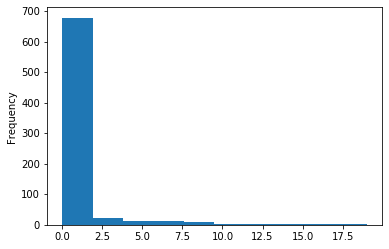

In [208]:
df['IUD (years)'].plot.hist()

### visualisation de la moyenne de la  variable 'Age' , et la variable 'STDs (number)' selon la variable cible Biopsy

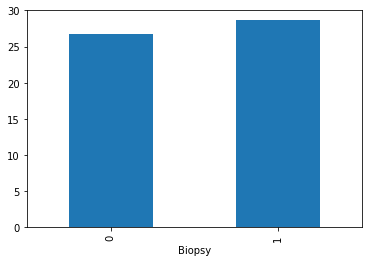

In [209]:
df.groupby('Biopsy')['Age'].mean().plot.bar()
plt.show()

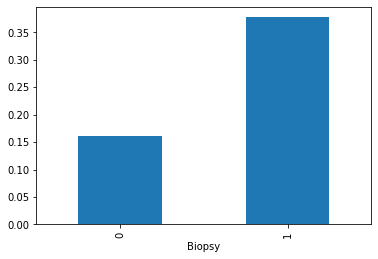

In [210]:
df.groupby('Biopsy')['STDs (number)'].mean().plot.bar()
plt.show()

In [211]:
---
    
    
  Les resultats ci-dessus montrent la moyenne de la variable age qui correspond aux croisement de la variable cible Biopsy et aux gens
qui souffrent de la STDs .

---

SyntaxError: invalid syntax (<ipython-input-211-7e90fbf9cfa9>, line 1)

In [ ]:
result = pd.pivot_table(data=df, index='STDs', columns='Biopsy',values='Age')
print(result)

#create heat map of education vs marital vs response_rate
sb.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# 4- Vérifier s'il manque des valeurs :

In [121]:
print("is there missing values?  : \n", df.isnull().values.any())

is there missing values?  : 
 True


## 5- Remplacer les données manquantes par le mode de chaque variable :

#### supprimer des variables qu'on ne va pas utiliser suivant l'article

In [122]:
df.drop(['Num of pregnancies', 'Smokes','Smokes (years)','Smokes (packs/year)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis'], axis=1, inplace=True)

In [123]:
df.drop(['STDs:syphilis', 'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:HPV'], axis=1, inplace=True)

In [124]:
df.drop(['STDs:Hepatitis B', 'STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV','Dx'], axis=1, inplace=True)

In [125]:
df.drop(['Hormonal Contraceptives', 'IUD','Hinselmann','Schiller','Citology'], axis=1, inplace=True)

#### la fonction pour convertir le string en bool , pour transformer le type de la  variable cible " Biopsy" de string en boolean

In [126]:
def make_bool(i):
    try:
        return bool(i)
    except:
        return pd.np.nan

In [127]:
df['Biopsy'] = df['Biopsy'].map(make_bool)

In [128]:
df.dtypes

Age                                  int64
Number of sexual partners          float64
First sexual intercourse           float64
Hormonal Contraceptives (years)    float64
IUD (years)                        float64
STDs                               float64
STDs (number)                      float64
STDs: Number of diagnosis            int64
Biopsy                                bool
dtype: object

#### remplacer les valeurs manquantes

In [129]:
for x in df.columns:
        df[x].replace(to_replace = np.nan, value = statistics.mode(df[x]),inplace=True)

#### vérifier si il existe encore des données manquantes

In [130]:
print("is there missing values?  : \n", df.isnull().values.any())

is there missing values?  : 
 False


#### vérifier que tous les colomnes n'ont pas de valeurs manquantes 

In [131]:
for x in df.columns:
    print(df[x].isnull().sum())

0
0
0
0
0
0
0
0
0


## 6- Normalisation :

#### calculer la moyenne pour chaque colomne , puis la retrancher de chaque columne

In [42]:
X = df.drop('Biopsy', axis=1)


In [43]:
for x in X.columns:
       X[x] = X[x] - X[x].mean()

#### calculer l'écart-type pour chaque colomne , puis diviser les colomnes sur l'écart-type

In [46]:
for a in X.columns:
       X[a] = X[a]/(statistics.stdev(X[a]))

# II - Prédiction du cancer du col l'utérus en utilisant  2 méthodes différentes :

le cancer du col l'utérus fut parmi l'une des causes principales de l'augmentation du taux de la mortalité, c'est pour cela 
les data analystes ont pris les facteurs de risques comme les maladies sexuellememt transmises , la contraception hormonale ...,pour voir si ces facteurs de risques seront les variables correspondantes pour faire la prediction de cette maladie 

---
 apres avoir effectuer le preprocessing sur les donnees , et garder les variables avec lesquelles on va continuer par etablir 
 deux modeles , qui se basent sur les  deux algorithmes de l'apprentissage supervise :le naive bayesien , le support vector classifier , pour verifier l'efficacite de ces deux algorithme en prenant compte de l'accuracy , la precision , la matrice de confusion

---

## 1- la division des données :

#### on donne 80% des données au training , et 20% des données au test

In [177]:
x=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## 2- la méthode naive bayes classifier  (NB) :

### 2-a  établir le modéle en se basant sur la fonction pré-définie

In [179]:
model = GaussianNB()

model.fit(X_train,y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### 2-b prédire les classes de la maladie par la fonction predict

In [180]:
predicted = model.predict(X_test)

In [181]:
expected=y_test

### 2-c le calcul de l'accuracy , la précision 

In [182]:
accuracy_score(expected,predicted)

0.8546511627906976

In [183]:
print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       162
           1       0.17      0.40      0.24        10

    accuracy                           0.85       172
   macro avg       0.57      0.64      0.58       172
weighted avg       0.91      0.85      0.88       172



### 2-d la matrice de confusion

In [184]:
print(metrics.confusion_matrix(expected, predicted))

[[143  19]
 [  6   4]]


In [185]:
cm=metrics.confusion_matrix(expected, predicted)

[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

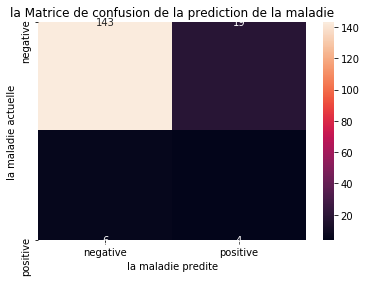

In [186]:
labels = {0:'negative', 1:'positive'}

ax = sb.heatmap(cm, annot = True, fmt = "d")
ax.set_xlabel('la maladie predite')
ax.set_ylabel('la maladie actuelle')
ax.set_title('la Matrice de confusion de la prediction de la maladie')
ax.set_xticklabels(labels.values())
ax.set_yticklabels(labels.values())

## 3- la méthode   (SVM) :

---
#### on utilisera trois type de fonctions attribués a la fonction kernel , associe a la fonction predefinie de Support vector classifier, la fonction polynomiale , la fonction gaussienne , la fonction sigmoid


---

### 3-1 la fonction polynomiale

### 3-1-1  établir le modéle en se basant sur la fonction pré-définie

In [93]:
from sklearn.svm import SVC
svclassifierP = SVC(kernel='poly',gamma='auto', degree=8)
modelP=svclassifierP.fit(X_train, y_train.values.ravel())

### 3-1-2 prédire les classes de la maladie par la fonction predict

In [172]:
y_predpoly = modelP.predict(X_test)


### 3-1-3 le calcul de l'accuracy , la précision 

In [173]:
accuracy_score(y_test,y_predpoly)

0.9244186046511628

In [174]:
print(metrics.classification_report(y_test,y_predpoly))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       164
        True       0.14      0.12      0.13         8

    accuracy                           0.92       172
   macro avg       0.55      0.54      0.55       172
weighted avg       0.92      0.92      0.92       172



### 3-1-4 la matrice de confusion

In [175]:
print(metrics.confusion_matrix(y_test,y_predpoly))

[[158   6]
 [  7   1]]


In [187]:
cmp=metrics.confusion_matrix(y_test,y_predpoly)

[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

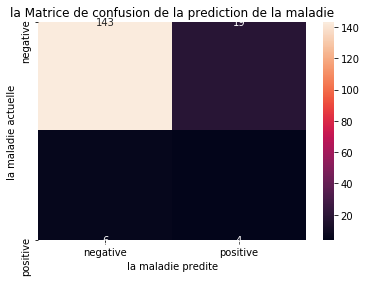

In [188]:
labels = {0:'negative', 1:'positive'}

ax = sb.heatmap(cm, annot = True, fmt = "d")
ax.set_xlabel('la maladie predite')
ax.set_ylabel('la maladie actuelle')
ax.set_title('la Matrice de confusion de la prediction de la maladie')
ax.set_xticklabels(labels.values())
ax.set_yticklabels(labels.values())

### 3-2 la fonction gaussienne

### 3-2-1  établir le modéle en se basant sur la fonction pré-définie

In [189]:
svclassifierG = SVC(kernel='rbf',C=1, gamma=0.001, random_state=1)
modelG=svclassifierG.fit(X_train, y_train.values.ravel())

### 3-2-2 prédire les classes de la maladie par la fonction predict

In [190]:
y_predgauss = modelG.predict(X_test)


### 3-2-3 le calcul de l'accuracy , la précision 

In [191]:
accuracy_score(y_test,y_predgauss)

0.9418604651162791

In [193]:
print(metrics.classification_report(y_test,y_predgauss))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       162
           1       0.00      0.00      0.00        10

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.49       172
weighted avg       0.89      0.94      0.91       172



### 3-2-4 la matrice de confusion


In [194]:
print(metrics.confusion_matrix(y_test,y_predgauss))

[[162   0]
 [ 10   0]]


In [195]:
cmgauss=metrics.confusion_matrix(y_test,y_predpoly)

[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

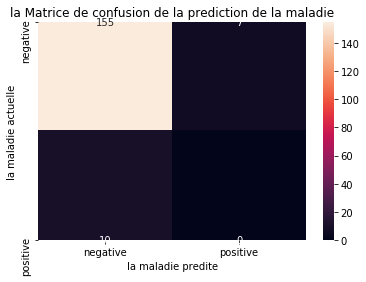

In [196]:
labels = {0:'negative', 1:'positive'}

ax = sb.heatmap(cmgauss, annot = True, fmt = "d")
ax.set_xlabel('la maladie predite')
ax.set_ylabel('la maladie actuelle')
ax.set_title('la Matrice de confusion de la prediction de la maladie')
ax.set_xticklabels(labels.values())
ax.set_yticklabels(labels.values())

### 3-3 la fonction de sigmoid


### 3-3-1  établir le modéle en se basant sur la fonction pré-définie

In [198]:
svclassifier = SVC(kernel='sigmoid',gamma='auto')
modelsig=svclassifier.fit(X_train, y_train.values.ravel())

### 3-3-2 prédire les classes de la maladie par la fonction predict

In [199]:
y_predsig = modelsig.predict(X_test)


### 3-3-3 le calcul de l'accuracy , la précision 

In [200]:
accuracy_score(y_test,y_predsig)

0.9127906976744186

In [201]:
print(metrics.classification_report(y_test,y_predsig))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       162
           1       0.00      0.00      0.00        10

    accuracy                           0.91       172
   macro avg       0.47      0.48      0.48       172
weighted avg       0.89      0.91      0.90       172



### 3-3-4 la matrice de confusion


In [202]:
print(metrics.confusion_matrix(y_test,y_predsig))

[[157   5]
 [ 10   0]]


In [203]:
cmsig=metrics.confusion_matrix(y_test,y_predsig)

[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

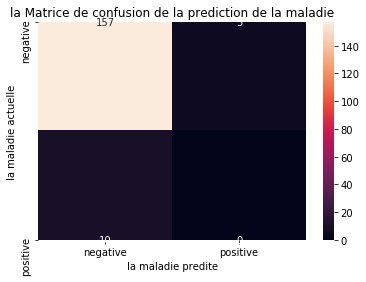

In [204]:
labels = {0:'negative', 1:'positive'}

ax = sb.heatmap(cmsig, annot = True, fmt = "d")
ax.set_xlabel('la maladie predite')
ax.set_ylabel('la maladie actuelle')
ax.set_title('la Matrice de confusion de la prediction de la maladie')
ax.set_xticklabels(labels.values())
ax.set_yticklabels(labels.values())